# Personal Project - Francesco Napoli

## Leonardo Merda Secca SEMPRE!



In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
#install.packages("glmnet", repos='http://cran.us.r-project.org')
library(glmnet)
#install.packages("h2o", repos='http://cran.us.r-project.org')
library(h2o)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix

Loaded glmnet 4.0-2


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are ma

In [2]:
data<-read.csv("summer-products-with-rating-and-performance_2020-08.csv",
               stringsAsFactors=FALSE)


In [4]:
head(data)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,⋯,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,16.00,14,EUR,100,0,3.76,54,26,⋯,568,4.128521,595097d6a26f6e070cb878d1,0,,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae51d43d6a96e303acdb0-medium.jpg,5e9ae51d43d6a96e303acdb0,summer,2020-08
2,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269,⋯,17752,3.899673,56458aa03a698c35c9050988,0,,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940d436a0d3d5da4e95a38-medium.jpg,58940d436a0d3d5da4e95a38,summer,2020-08
3,2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL,2020 New Arrival Women Spring and Summer Beach Wear Long Thin Cardigan Open Front Kimono Green Leaf Printed Chiffon Cardigan S-5XL,8.00,43,EUR,100,0,3.57,14,5,⋯,295,3.989831,5d464a1ffdf7bc44ee933c65,0,,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10e2c617580260d55310a-medium.jpg,5ea10e2c617580260d55310a,summer,2020-08
4,Hot Summer Cool T-shirt pour les femmes Mode Tops Abeille Lettres imprimées Manches courtes O Neck Coton T-shirts Tops Tee Vêtements,Hot Summer Cool T Shirt for Women Fashion Tops Bee Printed Letters Short Sleeve O Neck Cotton T-shirts Tops Tee Clothing,8.00,8,EUR,5000,1,4.03,579,295,⋯,23832,4.020435,58cfdefdacb37b556efdff7c,0,,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf17ad1d44c52c59e4aca-medium.jpg,5cedf17ad1d44c52c59e4aca,summer,2020-08
5,"Femmes Shorts d'été à lacets taille élastique lâche mince pantalon décontracté, plus la taille S-8XL",Women Summer Shorts Lace Up Elastic Waistband Loose Thin Casual Pants Plus Size S-8XL,2.72,3,EUR,100,1,3.10,20,6,⋯,14482,4.001588,5ab3b592c3911a095ad5dadb,0,,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5819ebac372b070b0e70-medium.jpg,5ebf5819ebac372b070b0e70,summer,2020-08
6,Plus la taille d'été femmes décontracté sans manches barboteuses combinaisons combinaison de couleur unie jarretelles pantalons lâche salopette,Plus Size Summer Women Casual Sleeveless Rompers Jumpsuits Solid Color Suspender Ttrousers Loose Overalls,3.92,9,EUR,10,0,5.00,1,1,⋯,65,3.507692,5e4b9c3801ba9d210036fc5a,0,,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec645bafd107a02279c8c54-medium.jpg,5ec645bafd107a02279c8c54,summer,2020-08


It is important to visualize the data before deciding about which variable would be interesting to keep and which is not.

In [6]:
table(data$urgency_text)


                                               Quantité limitée ! 
                            1100                              472 
Réduction sur les achats en gros 
                               1 

I start with the column "urgency_text". Using the table() function, I was able to understand how the different obs.
are divided.
I decide to transform the urgency text "Quantité limitée!" into a factor variable.

In [7]:
data$urgency_text<-ifelse(data$urgency_text=="Quantité limitée !",1,0)
table(data$urgency_text)
data$urgency_text<-as.factor(data$urgency_text)
str(data$urgency_text)


   0    1 
1101  472 

 Factor w/ 2 levels "0","1": 2 2 2 1 2 1 1 1 2 1 ...


In [10]:
tail(table(data$merchant_info_subtitle))


   95 % avis positifs (537 notes)  95 % avis positifs (6,719 notes) 
                                2                                 1 
96 % avis positifs (10,622 notes)    97 % avis positifs (160 notes) 
                                1                                 1 
   คำติชมเชิงบวก 82% (10,600 คะแนน)    คำติชมเชิงบวก 83% (32,168 คะแนน) 
                                1                                 1 

merchant_info_subtitle gives interesting information about the vendor info, the positive feedback
I'm gonna try to store these info into a factor variable


Warning message in base::as.numeric(x):
“NAs introduced by coercion”


infodata
 33  53  56  59  61  65  67  68  70  71  73  74  75  76  77  78  79  80  81  82 
  1   2   1   1   1   2   1   2   4   4  10   3   9   7  10  10  26  39  53  73 
 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97 100 
 85 102 130 135 107 104  92  70  63  30  21  13  10   1   1   2 

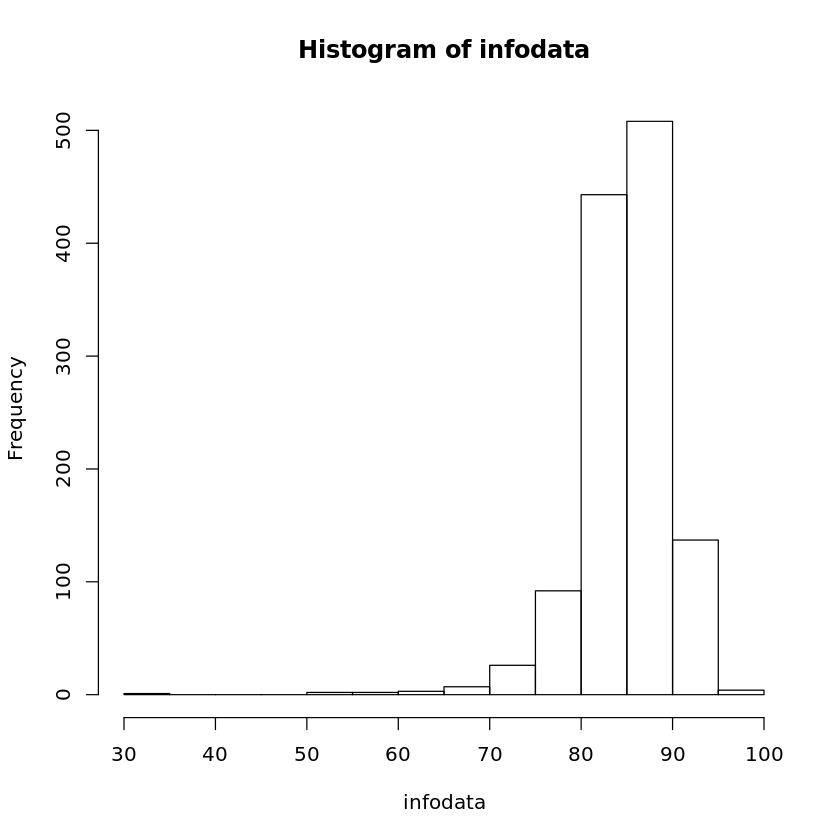

In [11]:
info<-strsplit(data$merchant_info_subtitle," ")
infodata=list()
for (i in 1:length(info)){
  test=unlist(info[i])
  test=test[1]
  
  if (length(test)<=2){
    infodata[i]=test
  }
  if (length(test)>2){
    infodata[i]=0
  }
}
infodata=unlist(infodata)
infodata=as.numeric(infodata)
table(infodata)
hist(infodata)